In [2]:
library(ggplot2)
library(data.table)

In [3]:
getwd()

[1] "/Users/ebiederstedt/GraphGenome_viz/notebooks"

In [4]:
total = fread("/Users/ebiederstedt/GraphGenome_viz/data/total_assembly_lengths.csv")

In [5]:
head(total)

NM,length,ratio,assembly
448,24378,0.018377225,CHM1
256,21397,0.011964294,CHM1
681,25534,0.026670322,CHM1
162,25895,0.006256034,CHM1
927,29604,0.031313336,CHM1
486,40267,0.012069437,CHM1


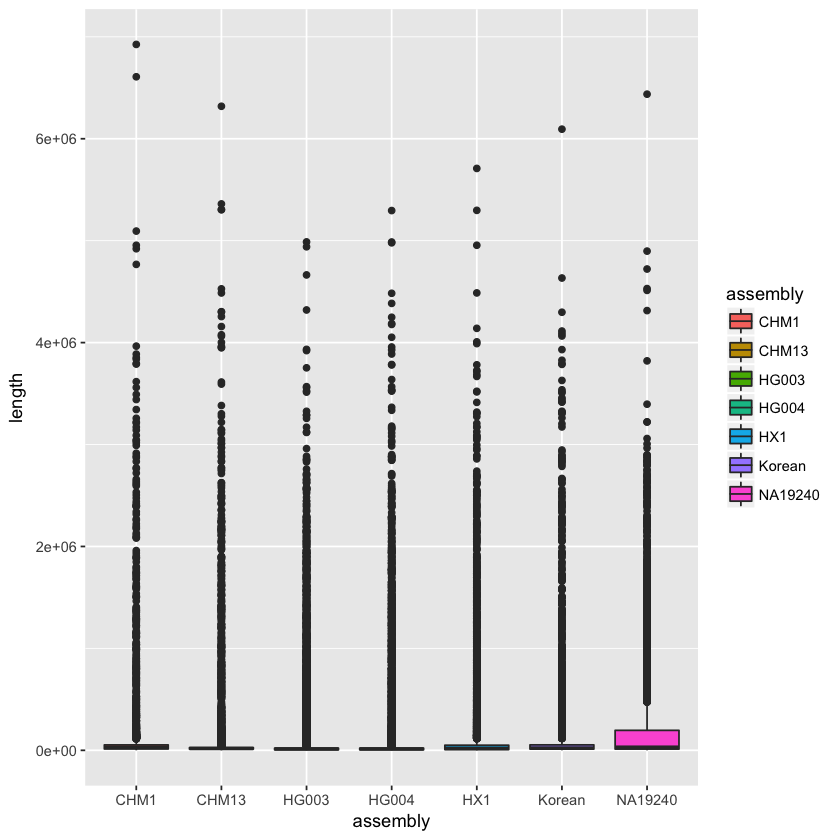

In [6]:
## a box plot that shows the distribution of contig lengths per input assembly

noscale = ggplot(total, aes(assembly, length, fill=assembly)) + geom_boxplot() 

print(noscale)

In [12]:
pp = ggplot(total, aes(assembly, length, fill=assembly)) + geom_boxplot() + scale_y_continuous(limits=c(0,1e5)) +
     labs(title="Contig lengths", x="Assembly", y = "Length [bp]")  + theme(legend.position="none")


## + scale_fill_brewer(palette="Dark2") 

### primary only!!

Warning message:
“Removed 6107 rows containing non-finite values (stat_boxplot).”

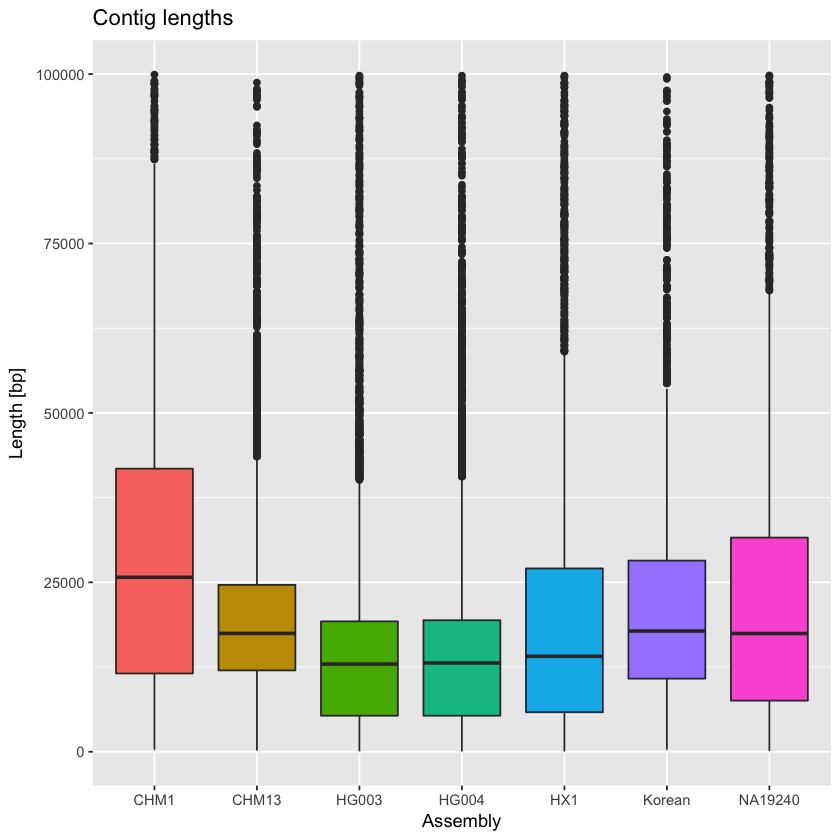

In [13]:
pp

In [9]:
###
### a box plot that shows the distribution of contig alignment error rates for the primary contig alignments (i.e. the data that you already produced)
### 

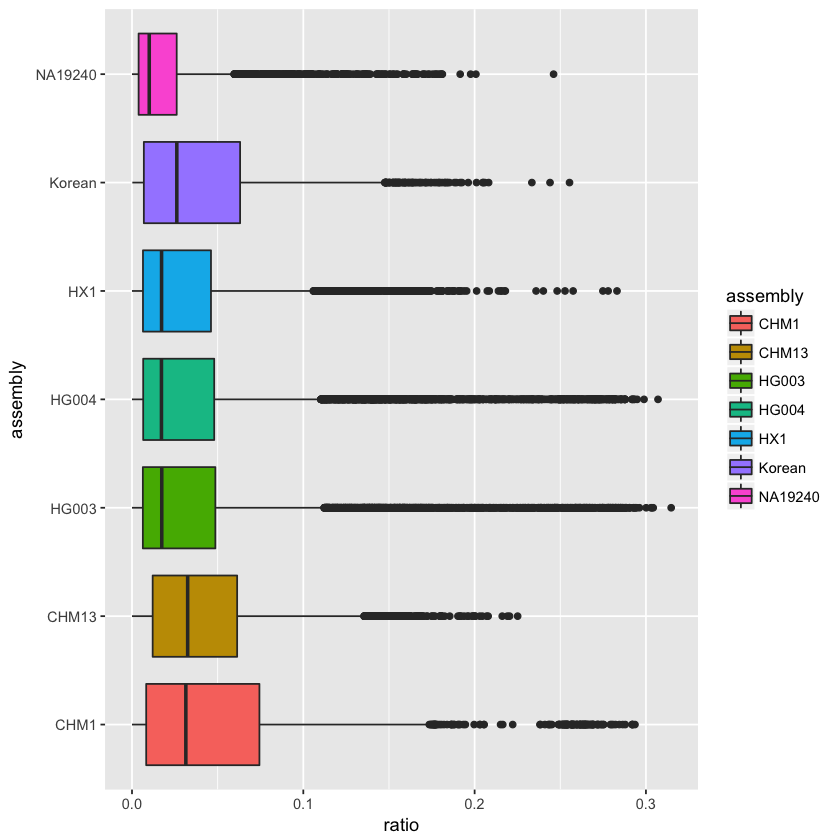

In [10]:
pp = ggplot(total, aes(assembly, ratio, fill=assembly)) + geom_boxplot() + coord_flip()

print(pp)

Warning message:
“Removed 1302 rows containing non-finite values (stat_boxplot).”

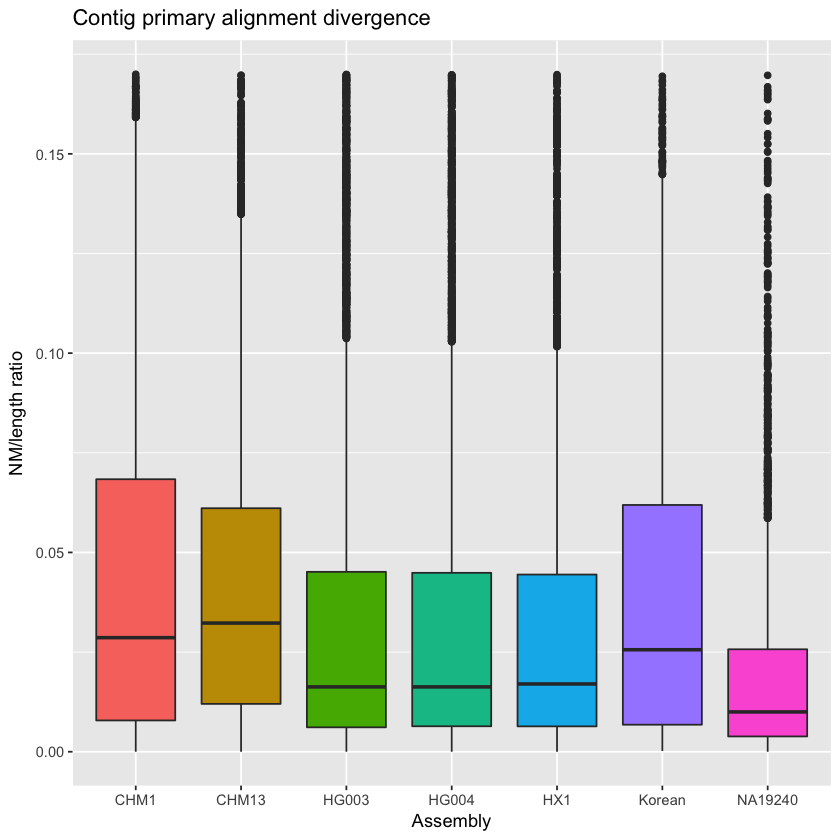

In [17]:
pp = ggplot(total, aes(assembly, ratio, fill=assembly)) + geom_boxplot() + scale_y_continuous(limits=c(0,0.17)) +
     labs(title="Contig primary alignment divergence", x="Assembly", y = "NM/length ratio") + theme(legend.position="none")

print(pp)

In [18]:
## 
##  A bar chart that shows the total combined contig size per input assembly
## 

In [12]:
### We will ignore non-primary alignments.
## 
### Convert these BAMs to FASTAs
## 
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1009 $ ls *.primary.withheader.bam
## CHM13.contigs.primary.withheader.bam  
## HG003.contigs.primary.withheader.bam  
## HX1.contigs.primary.withheader.bam     
## NA19240.contigs.primary.withheader.bam
## CHM1.contigs.primary.withheader.bam   
## HG004.contigs.primary.withheader.bam  
## Korean.contigs.primary.withheader.bam
## 
## https://broadinstitute.github.io/picard/command-line-overview.html#SamToFastq
## java -jar picard.jar SamToFastq \
##      I=input.bam \
##      FASTQ=output.fastq
## 

In [13]:
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1016 $ picard SamToFastq I=CHM13.contigs.primary.withheader.bam FASTQ=CHM13.contigs.primary.withheader.fastq

In [14]:
## This doesn't work, so forget it: 
## 

In [15]:
## http://seqanswers.com/forums/showthread.php?t=36160

In [16]:
## 
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1034 $ grep -v ">" CHM13.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 3065486803
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1035 $ grep -v ">" CHM1.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2996568292
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1036 $ grep -v ">" HG003.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 3084659641
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1037 $ grep -v ">" HG004.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 3054677982
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1038 $ grep -v ">" HX1.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2894799576
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1039 $ grep -v ">" Korean.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2866997781
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1040 $ grep -v ">" NA19240.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2813808095
## 

In [17]:
#######################################
## HX1.contigs.primary.withheader.fasta 
#######################################
## A 
## 855704225

## C
## 591446904

## G
## 591248258

## T
## 856318480

hx1_sum = 855704225 + 591446904 + 591248258 + 856318480 

#######################################
## HG003.contigs.primary.withheader.fasta
#######################################
## A
## 911294431

## C
## 630273343

## G
## 630101166

## T
## 912662446

hg003_sum = 911294431 + 630273343 + 630101166 + 912662446

#######################################
## HG004.contigs.primary.withheader.fasta
#######################################
## A
## 903381563

## C
## 623798629

## G
## 624046989

## T
## 903147295

hg004_sum =  903381563 + 623798629 + 624046989 + 903147295

#######################################
## CHM1.contigs.primary.withheader.fasta
#######################################
## A
## 886172060

## C
## 612397916

## G
## 611911148

## T
## 885945169

chm1_sum = 886172060 + 612397916 + 611911148 + 885945169


#######################################
## CHM13.contigs.primary.withheader.fasta
#######################################
## A
## 906584476

## C
## 625513349

## G
## 626598086

## T
## 906307252

chm13_sum = 906584476 + 625513349 + 626598086 + 906307252

#######################################
## Korean.contigs.primary.withheader.fasta
#######################################

## A
## 847709071

## C
## 585819362

## G
## 586014684

## T
## 847324632

korean_sum = 847709071 + 585819362 + 586014684 + 847324632


#######################################
## NA19240.contigs.primary.withheader.fasta
#######################################

## A
## 832294166

## C
## 574367726

## G 
## 574524644 

## T
## 832470233


na19240_sum = 832294166 + 574367726 + 574524644 + 832470233



In [18]:
### ... pretty close

#######################################
## HX1.contigs.primary.withheader.fasta 
#######################################

print(hx1_sum)
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1038 $ grep -v ">" HX1.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2894799576

#######################################
## HG003.contigs.primary.withheader.fasta
#######################################

print(hg003_sum)
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1036 $ grep -v ">" HG003.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 3084659641

#######################################
## HG004.contigs.primary.withheader.fasta
#######################################

print(hg004_sum)
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1037 $ grep -v ">" HG004.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 3054677982

#######################################
## CHM1.contigs.primary.withheader.fasta
#######################################

print(chm1_sum)
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1035 $ grep -v ">" CHM1.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2996568292

#######################################
## CHM13.contigs.primary.withheader.fasta
#######################################

print(chm13_sum)
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1034 $ grep -v ">" CHM13.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 3065486803

#######################################
## Korean.contigs.primary.withheader.fasta
#######################################

print(korean_sum)
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1039 $ grep -v ">" Korean.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2866997781

#######################################
## NA19240.contigs.primary.withheader.fasta
#######################################

print(na19240_sum)
## -bash:mskilab01:~/evan_projects/CSHL_hackathon_data 1040 $ grep -v ">" NA19240.contigs.primary.withheader.fastq | wc | awk '{print $3-$1}'
## 2813808095

[1] 2894717867
[1] 3084331386
[1] 3054374476
[1] 2996426293
[1] 3065003163
[1] 2866867749
[1] 2813656769


In [19]:
assembly_contig = data.table(assembly = c('HX1', 'HG003', 'HG004', 'CHM1', 'CHM13', 'Korean', 'NA19240'), 
                             size = c(2894717867, 3084331386, 3054374476, 2996426293, 3065003163, 2866867749, 2813656769))

In [20]:
assembly_contig

assembly,size
HX1,2894717867
HG003,3084331386
HG004,3054374476
CHM1,2996426293
CHM13,3065003163
Korean,2866867749
NA19240,2813656769


In [21]:
plt = ggplot(assembly_contig, aes(x=assembly, y=size, fill=assembly)) + geom_bar(stat="identity") + 
   coord_cartesian(ylim = c(2.7e9,3.3e9)) + coord_flip(ylim = c(2.7e9,3.2e9)) +  
   labs(title="Total combined contig size per input assembly", x="Assembly", y="Size [bp]")
                                                                                                                                      
                                                                                                                                      

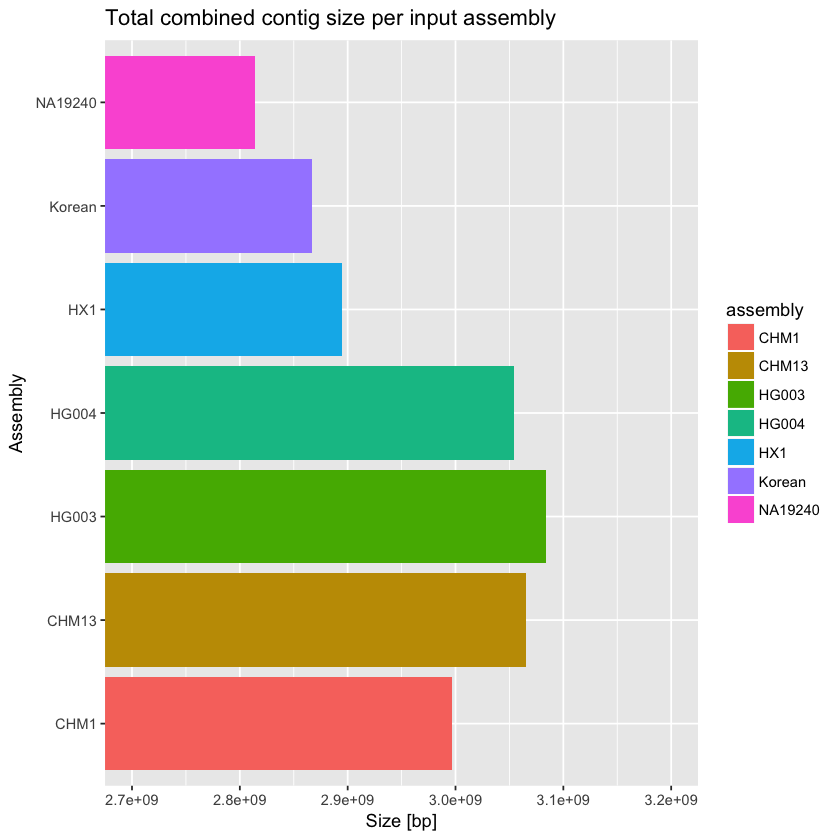

In [22]:
plt

In [23]:
contig_by_base = data.table(assembly = c('HX1', 'HG003', 'HG004', 'CHM1', 'CHM13', 'Korean', 'NA19240'), 
                             A = c(855704225, 911294431, 903381563, 886172060, 906584476, 847709071, 832294166), 
                             C = c(591446904, 630273343, 623798629, 612397916, 625513349, 585819362, 574367726), 
                             G = c(591248258, 630101166, 624046989, 611911148, 626598086, 586014684, 574524644), 
                             T = c(856318480, 912662446, 903147295, 885945169, 906307252, 847324632, 832470233))

In [24]:
dt = data.table(assembly = c('HX1', 'HX1', 'HX1', 'HX1', 'HG003', 'HG003', 'HG003', 'HG003', 'HG004', 'HG004', 'HG004', 'HG004', 
                             'CHM1','CHM1','CHM1','CHM1','CHM13','CHM13','CHM13','CHM13', 'Korean', 'Korean','Korean',
                             'Korean', 'NA19240', 'NA19240', 'NA19240', 'NA19240'),
                base = c('A', 'C', 'G', 'T', 'A', 'C', 'G', 'T', 'A', 'C', 'G', 'T', 'A', 'C', 'G', 'T', 
                         'A', 'C', 'G', 'T', 'A', 'C', 'G', 'T', 'A', 'C', 'G', 'T'),
                size = c(855704225, 591446904, 591248258, 856318480, 911294431, 630273343, 630101166, 912662446,
                        903381563, 623798629, 624046989, 903147295, 886172060, 612397916, 611911148, 885945169,
                        906584476, 625513349, 626598086, 906307252, 847709071, 585819362, 586014684, 847324632,
                        832294166, 574367726, 574524644,  832470233))
                             

In [25]:
dt

assembly,base,size
HX1,A,855704225
HX1,C,591446904
HX1,G,591248258
HX1,T,856318480
HG003,A,911294431
HG003,C,630273343
HG003,G,630101166
HG003,T,912662446
HG004,A,903381563
HG004,C,623798629


In [26]:
pp = ggplot(data=dt, aes(x=assembly, y=size, fill=base)) +
     geom_bar(stat="identity", color="black", position=position_dodge()) + coord_flip(ylim = c(5.5e8,9.5e8)) +  
     labs(title="Total combined contig size per input assembly, by base", x="Assembly", y="Size [bp]")

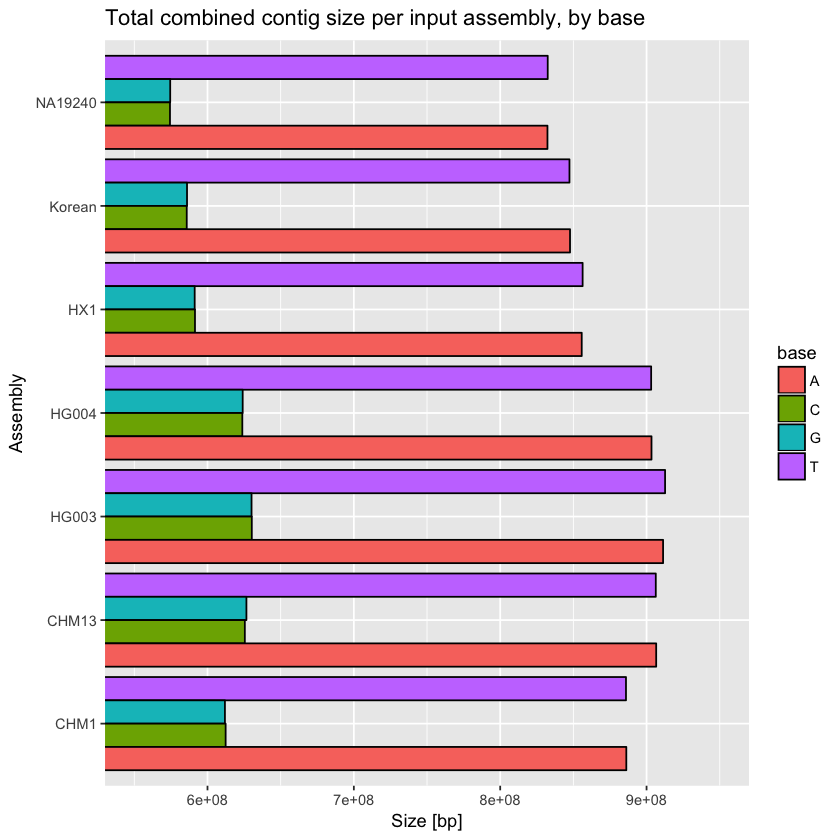

In [27]:
pp